### NBA API project
Try to understand relationship between a player's length, player impact (in terms of minutes, impact, & etc.)and team win. Team win will be dependent variable. This project is meant to test the NBA API and to webscrape from different web sources. The next NBA API project will be more comprehensive which will contain data from multiple years, include team defensive contribution, team win shares, & overall player effect on team.

Step 1 get team info during the 2021 via API and webscrape
Step 2 get players on each team
Step 3 join dataframe
Step 4 perform analysis
Step 5 run quick regression analysis

In [112]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import openpyxl
import nba_api
import requests
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
from sklearn.cluster import KMeans 
from sklearn import metrics
from scipy.spatial.distance import cdist 
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [113]:
headers  = {
    'Connection': 'keep-alive',
    'Accept': 'application/json, text/plain, */*',
    'x-nba-stats-token': 'true',
    'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_6) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/79.0.3945.130 Safari/537.36',
    'x-nba-stats-origin': 'stats',
    'Sec-Fetch-Site': 'same-origin',
    'Sec-Fetch-Mode': 'cors',
    'Referer': 'https://stats.nba.com/',
    'Accept-Encoding': 'gzip, deflate, br',
    'Accept-Language': 'en-US,en;q=0.9',
}

In [334]:
season_list = [
    #'1996-97',
    #'1997-98',
    #'1998-99',
    #'1999-00',
    #'2000-01',
    #'2001-02',
    #'2002-03',
    #'2003-04',
    #'2004-05',
    #'2005-06',
    #'2006-07',
    #'2007-08',
    #'2008-09',
    #'2009-10',
    #'2010-11',
    #'2011-12',
    #'2012-13',
    #'2013-14',
    #'2014-15',
    #'2015-16',
    '2016-17',
    '2017-18',
    '2018-19',
    '2019-20',
    '2020-21',
    '2021-22']

In [335]:
data = []

In [336]:
from nba_api.stats.endpoints import leaguegamefinder

#setting up for loop to grab df from nba_api

for x in season_list:
    gamefinder = leaguegamefinder.LeagueGameFinder(season_nullable = x, 
                                                   league_id_nullable="00",
                                                  season_type_nullable='Regular Season'
                                                  )
    # The first DataFrame of those returned is what we want.
    games = gamefinder.get_data_frames()[0]
    games1 = pd.DataFrame(games, columns=['SEASON_ID','TEAM_ID','GAME_ID','GAME_DATE','WL'])
    games1['Season_ID'] = x
    print("Season saved: " + x)
    data.append(games1)


Season saved: 2016-17
Season saved: 2017-18
Season saved: 2018-19
Season saved: 2019-20
Season saved: 2020-21
Season saved: 2021-22


In [337]:
dg = pd.concat(data, sort =False)

In [338]:
dg.to_csv('half_decade.csv')

In [339]:
dg.head()

,SEASON_ID,TEAM_ID,GAME_ID,GAME_DATE,WL,Season_ID
0,22016,1610612749,0021601219,2017-04-12,L,2016-17
1,22016,1610612765,0021601217,2017-04-12,L,2016-17
2,22016,1610612763,0021601223,2017-04-12,L,2016-17
3,22016,1610612739,0021601218,2017-04-12,L,2016-17
4,22016,1610612748,0021601221,2017-04-12,W,2016-17


In [340]:
dg21 = pd.DataFrame(dg, columns = ['TEAM_ID', 'Season_ID','GAME_ID'])
contain_values21 = dg21[dg21['Season_ID'].str.contains('2021-22')]
n = len(pd.unique(contain_values16['TEAM_ID']))
n #total teams check


30

In [358]:
contain_values21['TEAM_ID'].unique()

array([1610612747, 1610612739, 1610612740, 1610612766, 1610612751,
       1610612762, 1610612757, 1610612765, 1610612748, 1610612755,
       1610612741, 1610612761, 1610612760, 1610612738, 1610612764,
       1610612745, 1610612750, 1610612742, 1610612756, 1610612737,
       1610612753, 1610612763, 1610612754, 1610612758, 1610612752,
       1610612743, 1610612744, 1610612759, 1610612749, 1610612746])

In [359]:
gameid =contain_values21['GAME_ID'].values.tolist()
game = gameid
print(game)

['0022101072', '0022101072', '0022101071', '0022101071', '0022101075', '0022101075', '0022101073', '0022101073', '0022101074', '0022101074', '0022101076', '0022101076', '0022101078', '0022101078', '0022101077', '0022101077', '0022101079', '0022101079', '0022101066', '0022101064', '0022101064', '0022101065', '0022101065', '0022101063', '0022101063', '0022101062', '0022101062', '0022101066', '0022101067', '0022101067', '0022101068', '0022101068', '0022101070', '0022101070', '0022101069', '0022101069', '0022101058', '0022101058', '0022101059', '0022101059', '0022101060', '0022101060', '0022101061', '0022101061', '0022101046', '0022101046', '0022101047', '0022101047', '0022101050', '0022101050', '0022101048', '0022101048', '0022101051', '0022101051', '0022101052', '0022101056', '0022101056', '0022101057', '0022101057', '0022101055', '0022101055', '0022101054', '0022101054', '0022101053', '0022101053', '0022101049', '0022101049', '0022101052', '0022101045', '0022101045', '0022101038', '0022

In [360]:
from nba_api.stats.endpoints import boxscorefourfactorsv2
import time

In [361]:
new_data = []
test = 0

In [362]:
#setting up for loop to grab df from nba_api

for y in game:
    bs4_finder = boxscorefourfactorsv2.BoxScoreFourFactorsV2(game_id = y
    )
    bs4 = bs4_finder.get_data_frames()[0]
    dfbs4 = pd.DataFrame(bs4)
    new_data.append(dfbs4)
    time.sleep(1)
    print(y)
     

0022101072
0022101072
0022101071
0022101071
0022101075
0022101075
0022101073
0022101073
0022101074
0022101074
0022101076
0022101076
0022101078
0022101078
0022101077
0022101077
0022101079
0022101079
0022101066
0022101064
0022101064
0022101065
0022101065
0022101063
0022101063
0022101062
0022101062
0022101066
0022101067
0022101067
0022101068
0022101068
0022101070
0022101070
0022101069
0022101069
0022101058
0022101058
0022101059
0022101059
0022101060
0022101060
0022101061
0022101061
0022101046
0022101046
0022101047
0022101047
0022101050
0022101050
0022101048
0022101048
0022101051
0022101051
0022101052
0022101056
0022101056
0022101057
0022101057
0022101055
0022101055
0022101054
0022101054
0022101053
0022101053
0022101049
0022101049
0022101052
0022101045
0022101045
0022101038
0022101036
0022101036
0022101037
0022101037
0022101034
0022101034
0022101035
0022101035
0022101033
0022101033
0022101044
0022101044
0022101043
0022101043
0022101042
0022101042
0022101041
0022101041
0022101040
0022101040

0022100715
0022100454
0022100714
0022100713
0022100713
0022100712
0022100712
0022100730
0022100730
0022100709
0022100709
0022100702
0022100702
0022100701
0022100701
0022100700
0022100700
0022100704
0022100704
0022100708
0022100708
0022100707
0022100707
0022100699
0022100699
0022100706
0022100698
0022100698
0022100706
0022100705
0022100705
0022100703
0022100703
0022100696
0022100696
0022100695
0022100695
0022100697
0022100697
0022100694
0022100689
0022100689
0022100691
0022100691
0022100690
0022100686
0022100690
0022100686
0022100684
0022100684
0022100685
0022100685
0022100687
0022100687
0022100693
0022100688
0022100693
0022100694
0022100692
0022100692
0022100688
0022100681
0022100682
0022100682
0022100683
0022100683
0022100681
0022100669
0022100669
0022100672
0022100679
0022100679
0022100678
0022100678
0022100677
0022100677
0022100675
0022100675
0022100671
0022100674
0022100674
0022100671
0022100673
0022100673
0022100672
0022100676
0022100670
0022100680
0022100676
0022100680
0022100668

0022100340
0022100339
0022100329
0022100329
0022100330
0022100328
0022100328
0022100332
0022100332
0022100331
0022100331
0022100330
0022100319
0022100319
0022100320
0022100320
0022100321
0022100321
0022100323
0022100323
0022100322
0022100327
0022100327
0022100324
0022100324
0022100326
0022100326
0022100325
0022100325
0022100322
0022100314
0022100314
0022100318
0022100316
0022100315
0022100318
0022100317
0022100315
0022100316
0022100317
0022100307
0022100311
0022100312
0022100312
0022100311
0022100310
0022100305
0022100305
0022100313
0022100313
0022100306
0022100310
0022100309
0022100309
0022100307
0022100308
0022100308
0022100306
0022100303
0022100303
0022100300
0022100302
0022100304
0022100304
0022100300
0022100301
0022100302
0022100301
0022100294
0022100299
0022100299
0022100297
0022100292
0022100292
0022100293
0022100293
0022100297
0022100298
0022100298
0022100296
0022100296
0022100295
0022100294
0022100295
0022100291
0022100281
0022100281
0022100291
0022100290
0022100290
0022100289

In [363]:
test = pd.concat(new_data, sort =False)

In [364]:
test.head()

,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,EFG_PCT,FTA_RATE,TM_TOV_PCT,OREB_PCT,OPP_EFG_PCT,OPP_FTA_RATE,OPP_TOV_PCT,OPP_OREB_PCT
0,0022101072,1610612747,LAL,Los Angeles,1629117,Wenyen Gabriel,Wenyen,F,,31:47,0.587,0.190,0.077,0.276,0.602,0.286,0.177,0.174
1,0022101072,1610612747,LAL,Los Angeles,2544,LeBron James,LeBron,F,,40:36,0.675,0.130,0.087,0.267,0.612,0.145,0.095,0.143
2,0022101072,1610612747,LAL,Los Angeles,2730,Dwight Howard,Dwight,C,,11:40,0.500,0.087,0.155,0.182,0.700,0.120,0.073,0.100
3,0022101072,1610612747,LAL,Los Angeles,1630559,Austin Reaves,Austin,G,,29:22,0.574,0.115,0.082,0.276,0.721,0.154,0.114,0.050
4,0022101072,1610612747,LAL,Los Angeles,201566,Russell Westbrook,Russell,G,,35:20,0.648,0.225,0.090,0.259,0.579,0.175,0.163,0.200


In [365]:
test.to_csv('2021now.csv')

bs4_finder = boxscorefourfactorsv2.BoxScoreFourFactorsV2(game_id = "0022000001"
)
bs4 = bs4_finder.get_data_frames()[0]
dfbs4 = pd.DataFrame(bs4)
dfbs4.head()


In [150]:
from bs4 import BeautifulSoup # this module helps in web scrapping.
import requests  # this module helps us to download a web page
import pandas as pd
import requests
import urllib.request
import urllib.parse


In [151]:
#this url contains the data you need to scrape
url = "https://craftednba.com/player-traits/length"
data  = requests.get(url).text

In [152]:
soup = BeautifulSoup(data,"html5lib")  # create a soup object using the variable 'data'

In [313]:
#find a html table in the web page
table = soup.find('table', class_ = 'table is-striped is-fullwidth') # in html table is represented by the tag <table>
dftable = pd.read_html(str(table))[0]
dftable

,#,Name,length,height,wingspan
0,1,Mo Bamba ORL | C,10.75,"6'11.25""","7'10"""
1,2,Talen Horton-Tucker LAL | SF,9.75,"6'3.5""","7'1.25"""
2,3,Isaiah Stewart DET | C,9.50,"6'7.25""","7'4.75"""
3,4,Robert Williams III BOS | C,9.50,"6'8""","7'5.5"""
4,5,Montrezl Harrell CHA | C,9.25,"6'7""","7'4.25"""
...,...,...,...,...,...
396,397,Frank Kaminsky PHX | C,-0.75,"6'11.75""","6'11"""
397,398,Kelly Olynyk DET | C,-1.00,"6'10.75""","6'9.75"""
398,399,Kevin Pangos CLE | PG,-1.00,"6'1""","6'0"""
399,400,Tyler Herro MIA | SG,-1.25,"6'4.5""","6'3.25"""


In [314]:
dftable['player_name'] = dftable['Name'].str[:-8]
dftable.rename(columns={'player_name': 'PLAYER_NAME'}, inplace=True)
dftable['PLAYER_NAME'].str.rstrip()
dftable['wingspan'].str.replace(" ","")
dftable

,#,Name,length,height,wingspan,PLAYER_NAME
0,1,Mo Bamba ORL | C,10.75,"6'11.25""","7'10""",Mo Bamba
1,2,Talen Horton-Tucker LAL | SF,9.75,"6'3.5""","7'1.25""",Talen Horton-Tucker
2,3,Isaiah Stewart DET | C,9.50,"6'7.25""","7'4.75""",Isaiah Stewart
3,4,Robert Williams III BOS | C,9.50,"6'8""","7'5.5""",Robert Williams III
4,5,Montrezl Harrell CHA | C,9.25,"6'7""","7'4.25""",Montrezl Harrell
...,...,...,...,...,...,...
396,397,Frank Kaminsky PHX | C,-0.75,"6'11.75""","6'11""",Frank Kaminsky
397,398,Kelly Olynyk DET | C,-1.00,"6'10.75""","6'9.75""",Kelly Olynyk
398,399,Kevin Pangos CLE | PG,-1.00,"6'1""","6'0""",Kevin Pangos
399,400,Tyler Herro MIA | SG,-1.25,"6'4.5""","6'3.25""",Tyler Herro


In [315]:
dftable.to_csv('players.csv')

In [366]:
players = pd.read_csv('players.csv')


In [367]:
players = players[['PLAYER_NAME', 'wingspan']]
players['wingspan'] = players['wingspan'].astype(float)
players


,PLAYER_NAME,wingspan
0,Mo Bamba,7.100
1,Talen Horton-Tucker,7.125
2,Isaiah Stewart,7.475
3,Robert Williams III,7.550
4,Montrezl Harrell,7.425
...,...,...
396,Frank Kaminsky,6.110
397,Kelly Olynyk,6.975
398,Kevin Pangos,6.000
399,Tyler Herro,6.325


In [354]:
players.dtypes

PLAYER_NAME     object
wingspan       float64
dtype: object

In [396]:
games21 = pd.read_csv('2021now.csv')
games21.head()

,Unnamed: 0,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,EFG_PCT,FTA_RATE,TM_TOV_PCT,OREB_PCT,OPP_EFG_PCT,OPP_FTA_RATE,OPP_TOV_PCT,OPP_OREB_PCT
0,0,22101072,1610612747,LAL,Los Angeles,1629117,Wenyen Gabriel,Wenyen,F,NaN,31:47,0.587,0.190,0.077,0.276,0.602,0.286,0.177,0.174
1,1,22101072,1610612747,LAL,Los Angeles,2544,LeBron James,LeBron,F,NaN,40:36,0.675,0.130,0.087,0.267,0.612,0.145,0.095,0.143
2,2,22101072,1610612747,LAL,Los Angeles,2730,Dwight Howard,Dwight,C,NaN,11:40,0.500,0.087,0.155,0.182,0.700,0.120,0.073,0.100
3,3,22101072,1610612747,LAL,Los Angeles,1630559,Austin Reaves,Austin,G,NaN,29:22,0.574,0.115,0.082,0.276,0.721,0.154,0.114,0.050
4,4,22101072,1610612747,LAL,Los Angeles,201566,Russell Westbrook,Russell,G,NaN,35:20,0.648,0.225,0.090,0.259,0.579,0.175,0.163,0.200


In [397]:
merged = games21.merge(players, how ="outer", on =['PLAYER_NAME'])
merged

,Unnamed: 0,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,EFG_PCT,FTA_RATE,TM_TOV_PCT,OREB_PCT,OPP_EFG_PCT,OPP_FTA_RATE,OPP_TOV_PCT,OPP_OREB_PCT,wingspan
0,0.0,22101072.0,1.610613e+09,LAL,Los Angeles,1629117.0,Wenyen Gabriel,Wenyen,F,NaN,31:47,0.587,0.190,0.077,0.276,0.602,0.286,0.177,0.174,NaN
1,0.0,22101072.0,1.610613e+09,LAL,Los Angeles,1629117.0,Wenyen Gabriel,Wenyen,F,NaN,31:47,0.587,0.190,0.077,0.276,0.602,0.286,0.177,0.174,NaN
2,7.0,22101061.0,1.610613e+09,LAL,Los Angeles,1629117.0,Wenyen Gabriel,Wenyen,NaN,NaN,11:38,0.735,0.118,0.335,0.333,0.521,0.500,0.000,0.364,NaN
3,7.0,22101061.0,1.610613e+09,LAL,Los Angeles,1629117.0,Wenyen Gabriel,Wenyen,NaN,NaN,11:38,0.735,0.118,0.335,0.333,0.521,0.500,0.000,0.364,NaN
4,1.0,22101051.0,1.610613e+09,LAL,Los Angeles,1629117.0,Wenyen Gabriel,Wenyen,F,NaN,24:52,0.679,0.310,0.123,0.263,0.583,0.208,0.101,0.381,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55029,NaN,NaN,NaN,NaN,NaN,NaN,T.J. Warren,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.1025
55030,NaN,NaN,NaN,NaN,NaN,NaN,Jamal Murray,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.6500
55031,NaN,NaN,NaN,NaN,NaN,NaN,Jonathan Isaac,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.1000
55032,NaN,NaN,NaN,NaN,NaN,NaN,Michael Carter-Williams,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.7250


In [400]:
merged.dropna(subset=['GAME_ID'],axis=0,how='all', inplace=True)
merged.dropna(subset=['MIN'],axis=0,how='all', inplace=True)


In [401]:
merged

,Unnamed: 0,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,MIN,EFG_PCT,FTA_RATE,TM_TOV_PCT,OREB_PCT,OPP_EFG_PCT,OPP_FTA_RATE,OPP_TOV_PCT,OPP_OREB_PCT,wingspan
0,0.0,22101072.0,1.610613e+09,LAL,Los Angeles,1629117.0,Wenyen Gabriel,Wenyen,F,NaN,31:47,0.587,0.190,0.077,0.276,0.602,0.286,0.177,0.174,NaN
1,0.0,22101072.0,1.610613e+09,LAL,Los Angeles,1629117.0,Wenyen Gabriel,Wenyen,F,NaN,31:47,0.587,0.190,0.077,0.276,0.602,0.286,0.177,0.174,NaN
2,7.0,22101061.0,1.610613e+09,LAL,Los Angeles,1629117.0,Wenyen Gabriel,Wenyen,NaN,NaN,11:38,0.735,0.118,0.335,0.333,0.521,0.500,0.000,0.364,NaN
3,7.0,22101061.0,1.610613e+09,LAL,Los Angeles,1629117.0,Wenyen Gabriel,Wenyen,NaN,NaN,11:38,0.735,0.118,0.335,0.333,0.521,0.500,0.000,0.364,NaN
4,1.0,22101051.0,1.610613e+09,LAL,Los Angeles,1629117.0,Wenyen Gabriel,Wenyen,F,NaN,24:52,0.679,0.310,0.123,0.263,0.583,0.208,0.101,0.381,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54995,14.0,22100024.0,1.610613e+09,DEN,Denver,1629008.0,Michael Porter Jr.,Michael,F,NaN,27:10,0.538,0.058,0.206,0.269,0.568,0.273,0.160,0.105,7.0
54996,0.0,22100012.0,1.610613e+09,DEN,Denver,1629008.0,Michael Porter Jr.,Michael,F,NaN,33:60,0.698,0.121,0.197,0.160,0.406,0.203,0.125,0.175,7.0
54997,0.0,22100012.0,1.610613e+09,DEN,Denver,1629008.0,Michael Porter Jr.,Michael,F,NaN,33:60,0.698,0.121,0.197,0.160,0.406,0.203,0.125,0.175,7.0
55008,24.0,22100058.0,1.610613e+09,TOR,Toronto,1626155.0,Sam Dekker,Sam,NaN,NaN,0:54,0.000,0.000,0.000,0.000,0.833,0.000,0.000,1.000,NaN


In [402]:
merged['wingspan'].isna().value_counts()

False    38242
True      7560
Name: wingspan, dtype: int64

In [407]:
g21 = pd.read_csv('2021games.csv')
g21 = g21[['TEAM_ID', 'WL']]
g21

,TEAM_ID,WL
0,1610612747,W
1,1610612739,L
2,1610612740,L
3,1610612766,W
4,1610612751,W
...,...,...
2151,1610612741,W
2152,1610612744,W
2153,1610612747,L
2154,1610612749,W


In [419]:
final = merged.merge(g21, how ="outer", on =['TEAM_ID'])
final.dropna(subset=['MIN'],axis=0,how='all', inplace=True)
final

,Unnamed: 0,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,TEAM_CITY,PLAYER_ID,PLAYER_NAME,NICKNAME,START_POSITION,COMMENT,...,EFG_PCT,FTA_RATE,TM_TOV_PCT,OREB_PCT,OPP_EFG_PCT,OPP_FTA_RATE,OPP_TOV_PCT,OPP_OREB_PCT,wingspan,WL
0,0.0,22101072.0,1.610613e+09,LAL,Los Angeles,1629117.0,Wenyen Gabriel,Wenyen,F,NaN,...,0.587,0.19,0.077,0.276,0.602,0.286,0.177,0.174,NaN,W
1,0.0,22101072.0,1.610613e+09,LAL,Los Angeles,1629117.0,Wenyen Gabriel,Wenyen,F,NaN,...,0.587,0.19,0.077,0.276,0.602,0.286,0.177,0.174,NaN,L
2,0.0,22101072.0,1.610613e+09,LAL,Los Angeles,1629117.0,Wenyen Gabriel,Wenyen,F,NaN,...,0.587,0.19,0.077,0.276,0.602,0.286,0.177,0.174,NaN,W
3,0.0,22101072.0,1.610613e+09,LAL,Los Angeles,1629117.0,Wenyen Gabriel,Wenyen,F,NaN,...,0.587,0.19,0.077,0.276,0.602,0.286,0.177,0.174,NaN,L
4,0.0,22101072.0,1.610613e+09,LAL,Los Angeles,1629117.0,Wenyen Gabriel,Wenyen,F,NaN,...,0.587,0.19,0.077,0.276,0.602,0.286,0.177,0.174,NaN,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3291939,26.0,22100117.0,1.610613e+09,GSW,Golden State,1630288.0,Jeff Dowtin,Jeff,NaN,NaN,...,0.625,0.00,0.000,0.000,0.000,0.000,0.250,0.000,NaN,L
3291940,26.0,22100117.0,1.610613e+09,GSW,Golden State,1630288.0,Jeff Dowtin,Jeff,NaN,NaN,...,0.625,0.00,0.000,0.000,0.000,0.000,0.250,0.000,NaN,W
3291941,26.0,22100117.0,1.610613e+09,GSW,Golden State,1630288.0,Jeff Dowtin,Jeff,NaN,NaN,...,0.625,0.00,0.000,0.000,0.000,0.000,0.250,0.000,NaN,W
3291942,26.0,22100117.0,1.610613e+09,GSW,Golden State,1630288.0,Jeff Dowtin,Jeff,NaN,NaN,...,0.625,0.00,0.000,0.000,0.000,0.000,0.250,0.000,NaN,W


In [450]:
finaledit = final.drop_duplicates(
  subset = ['GAME_ID', 'PLAYER_ID'],
  keep = 'last').reset_index(drop = True)

In [451]:
finaledit=finaledit.drop(['COMMENT', 
                'TEAM_CITY',
                'NICKNAME',
                'COMMENT'], 
               axis=1)
finaledit

,Unnamed: 0,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_ID,PLAYER_NAME,START_POSITION,MIN,EFG_PCT,FTA_RATE,TM_TOV_PCT,OREB_PCT,OPP_EFG_PCT,OPP_FTA_RATE,OPP_TOV_PCT,OPP_OREB_PCT,wingspan,WL
0,1.0,22101072.0,1.610613e+09,LAL,2544.0,LeBron James,F,40:36,0.675,0.130,0.087,0.267,0.612,0.145,0.095,0.143,7.025,L
1,2.0,22101061.0,1.610613e+09,LAL,2544.0,LeBron James,C,35:53,0.610,0.096,0.126,0.233,0.623,0.344,0.106,0.100,7.025,L
2,0.0,22101051.0,1.610613e+09,LAL,2544.0,LeBron James,F,44:41,0.564,0.205,0.136,0.243,0.586,0.198,0.126,0.333,7.025,L
3,1.0,22101039.0,1.610613e+09,LAL,2544.0,LeBron James,F,37:04,0.493,0.229,0.148,0.235,0.551,0.397,0.191,0.375,7.025,L
4,14.0,22101028.0,1.610613e+09,LAL,2544.0,LeBron James,C,40:20,0.446,0.257,0.149,0.170,0.476,0.378,0.121,0.381,7.025,L
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19116,20.0,22100086.0,1.610613e+09,GSW,2738.0,Andre Iguodala,NaN,17:15,0.438,0.063,0.143,0.158,0.273,0.091,0.174,0.048,6.110,W
19117,24.0,22100070.0,1.610613e+09,GSW,2738.0,Andre Iguodala,NaN,25:23,0.442,0.070,0.166,0.160,0.438,0.125,0.158,0.296,6.110,W
19118,8.0,22100051.0,1.610613e+09,GSW,2738.0,Andre Iguodala,NaN,19:18,0.574,0.088,0.130,0.111,0.414,0.143,0.194,0.200,6.110,W
19119,19.0,22100016.0,1.610613e+09,GSW,2738.0,Andre Iguodala,NaN,23:36,0.645,0.263,0.218,0.176,0.389,0.244,0.082,0.167,6.110,W


In [452]:
finaledit.dropna(subset=['wingspan'],axis=0,how='all', inplace=True)

In [597]:
finaledit=finaledit.replace({'WL': 'W'}, 1)
finaledit=finaledit.replace({'WL': 'L'}, 0)
finaledit=finaledit.replace({'MIN': ':'}, ".", regex=True)

In [598]:
finaledit

,Unnamed: 0,GAME_ID,TEAM_ID,TEAM_ABBREVIATION,PLAYER_ID,PLAYER_NAME,START_POSITION,MIN,EFG_PCT,FTA_RATE,TM_TOV_PCT,OREB_PCT,OPP_EFG_PCT,OPP_FTA_RATE,OPP_TOV_PCT,OPP_OREB_PCT,wingspan,WL
0,1.0,22101072.0,1.610613e+09,LAL,2544.0,LeBron James,F,40.36,0.675,0.130,0.087,0.267,0.612,0.145,0.095,0.143,7.025,0
1,2.0,22101061.0,1.610613e+09,LAL,2544.0,LeBron James,C,35.53,0.610,0.096,0.126,0.233,0.623,0.344,0.106,0.100,7.025,0
2,0.0,22101051.0,1.610613e+09,LAL,2544.0,LeBron James,F,44.41,0.564,0.205,0.136,0.243,0.586,0.198,0.126,0.333,7.025,0
3,1.0,22101039.0,1.610613e+09,LAL,2544.0,LeBron James,F,37.04,0.493,0.229,0.148,0.235,0.551,0.397,0.191,0.375,7.025,0
4,14.0,22101028.0,1.610613e+09,LAL,2544.0,LeBron James,C,40.20,0.446,0.257,0.149,0.170,0.476,0.378,0.121,0.381,7.025,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19116,20.0,22100086.0,1.610613e+09,GSW,2738.0,Andre Iguodala,NaN,17.15,0.438,0.063,0.143,0.158,0.273,0.091,0.174,0.048,6.110,1
19117,24.0,22100070.0,1.610613e+09,GSW,2738.0,Andre Iguodala,NaN,25.23,0.442,0.070,0.166,0.160,0.438,0.125,0.158,0.296,6.110,1
19118,8.0,22100051.0,1.610613e+09,GSW,2738.0,Andre Iguodala,NaN,19.18,0.574,0.088,0.130,0.111,0.414,0.143,0.194,0.200,6.110,1
19119,19.0,22100016.0,1.610613e+09,GSW,2738.0,Andre Iguodala,NaN,23.36,0.645,0.263,0.218,0.176,0.389,0.244,0.082,0.167,6.110,1


In [617]:
model_data = finaledit[['START_POSITION',
                        'MIN',
                        'EFG_PCT',
                       'FTA_RATE',
                       'TM_TOV_PCT',
                       'OREB_PCT',
                       'OPP_EFG_PCT',
                       'OPP_FTA_RATE',
                       'OPP_TOV_PCT',
                       'OPP_OREB_PCT',
                       'wingspan',
                       'WL']]

In [618]:
model_data['MIN']=pd.to_numeric(model_data['MIN'])

In [619]:
model_data.dtypes

START_POSITION     object
MIN               float64
EFG_PCT           float64
FTA_RATE          float64
TM_TOV_PCT        float64
OREB_PCT          float64
OPP_EFG_PCT       float64
OPP_FTA_RATE      float64
OPP_TOV_PCT       float64
OPP_OREB_PCT      float64
wingspan          float64
WL                  int64
dtype: object

In [620]:
model_data.corr()

,MIN,EFG_PCT,FTA_RATE,TM_TOV_PCT,OREB_PCT,OPP_EFG_PCT,OPP_FTA_RATE,OPP_TOV_PCT,OPP_OREB_PCT,wingspan,WL
MIN,1.000000,0.160999,-0.031467,-0.121599,0.045596,-0.018728,-0.083842,0.001922,0.027346,-0.068395,-0.023238
EFG_PCT,0.160999,1.000000,0.045429,-0.052940,0.006866,-0.044492,0.002426,0.013176,0.022197,-0.001929,0.048231
FTA_RATE,-0.031467,0.045429,1.000000,-0.009285,-0.045639,-0.017227,0.038728,0.026582,0.008897,0.002286,0.015587
TM_TOV_PCT,-0.121599,-0.052940,-0.009285,1.000000,0.038932,0.012067,0.041394,-0.012302,0.020631,0.018005,-0.033194
OREB_PCT,0.045596,0.006866,-0.045639,0.038932,1.000000,0.017323,-0.001486,0.022156,0.019582,0.034051,0.005711
OPP_EFG_PCT,-0.018728,-0.044492,-0.017227,0.012067,0.017323,1.000000,0.000406,-0.023791,-0.038921,-0.001535,-0.000205
OPP_FTA_RATE,-0.083842,0.002426,0.038728,0.041394,-0.001486,0.000406,1.000000,0.011751,-0.044418,-0.002107,-0.003503
OPP_TOV_PCT,0.001922,0.013176,0.026582,-0.012302,0.022156,-0.023791,0.011751,1.000000,0.050417,-0.006972,-0.026351
OPP_OREB_PCT,0.027346,0.022197,0.008897,0.020631,0.019582,-0.038921,-0.044418,0.050417,1.000000,-0.006188,-0.023544
wingspan,-0.068395,-0.001929,0.002286,0.018005,0.034051,-0.001535,-0.002107,-0.006972,-0.006188,1.000000,-0.011722


In [622]:
#creating dummies
#use this to make a column into dummies
dummy_variable_1 = pd.get_dummies(model_data["START_POSITION"])

# merge data frame "df" and "dummy_variable_1" 
model_data = pd.concat([model_data, dummy_variable_1], axis=1)

# drop original column "fuel-type" from "df"
model_data.drop("START_POSITION", axis = 1, inplace=True)

<AxesSubplot:>

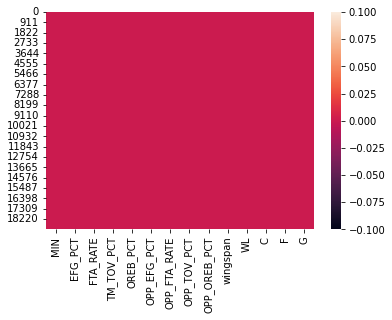

In [623]:
sns.heatmap(model_data.isnull())


In [604]:
#establishing predictor variables
y=model_data[['WL']]
z = model_data.drop('WL', axis=1)#predictor variables
z.head()

,MIN,EFG_PCT,FTA_RATE,TM_TOV_PCT,OREB_PCT,OPP_EFG_PCT,OPP_FTA_RATE,OPP_TOV_PCT,OPP_OREB_PCT,wingspan,C,F,G
0,40.36,0.675,0.130,0.087,0.267,0.612,0.145,0.095,0.143,7.025,0,1,0
1,35.53,0.610,0.096,0.126,0.233,0.623,0.344,0.106,0.100,7.025,1,0,0
2,44.41,0.564,0.205,0.136,0.243,0.586,0.198,0.126,0.333,7.025,0,1,0
3,37.04,0.493,0.229,0.148,0.235,0.551,0.397,0.191,0.375,7.025,0,1,0
4,40.20,0.446,0.257,0.149,0.170,0.476,0.378,0.121,0.381,7.025,1,0,0


In [606]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [607]:
lm = LinearRegression()
# fit the model 
lm.fit(z, y)
# Find the R^2
print('The R-square is: ', lm.score(z, y))

The R-square is:  0.006422935124373308


In [624]:
from sklearn.linear_model import LogisticRegression
from scipy.special import expit
from sklearn.model_selection import train_test_split

In [630]:
X_train, X_test, y_train, y_test = train_test_split(model_data.drop('WL', axis=1), 
                                                    model_data['WL'], test_size=0.30, 
                                                    random_state=101)

In [631]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
predictions = logmodel.predict(X_test)

In [632]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.54      0.36      0.43      2838
           1       0.53      0.69      0.60      2899

    accuracy                           0.53      5737
   macro avg       0.53      0.53      0.52      5737
weighted avg       0.53      0.53      0.52      5737

